In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ironhack /Week 5 - EDA/Day 1 - Ananálisis Univariante/Lab/amz_uk_price_prediction_dataset.csv')

df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [6]:
freq_table = df['category'].value_counts().sort_values(ascending=False).head(5)

freq_table

,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


In [9]:
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_base',
 '_compat',
 '_core',
 '_docstrings',
 '_orig_rc_params',
 '_statistics',
 '_stats',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'displot',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'ecdfplot',
 'external',
 'get_data_home',
 'get_dataset_names',
 'heatmap',
 'histplot',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'matrix

/tmp/ipython-input-3474554974.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(freq_table, palette='deep')


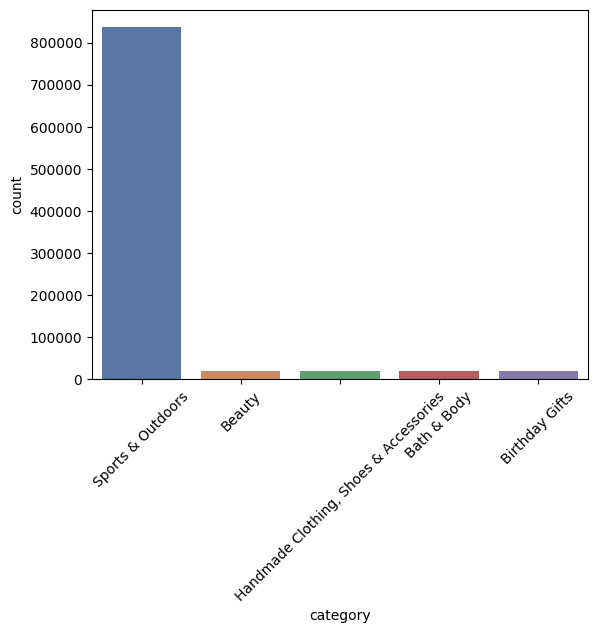

<Figure size 1200x600 with 0 Axes>

In [18]:
sns.barplot(freq_table, palette='deep')

plt.xticks(rotation=45)
plt.figure(figsize=(12,6))
plt.show()

<Axes: ylabel='count'>

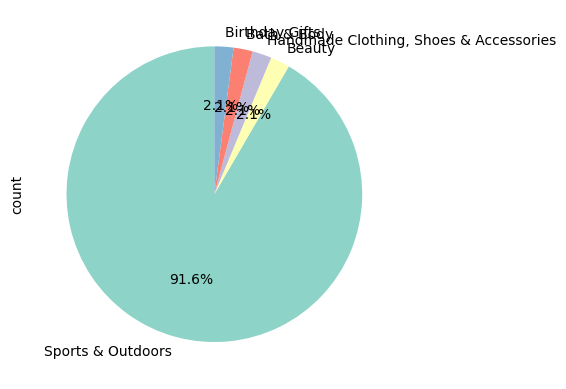

In [21]:
freq_table.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

In [25]:
df_mean = df['price'].mean()
df_median = df['price'].median()
df_mode = df['price'].mode()

print(f'media: {df_mean}, mediana: {df_median}, moda; {df_mode}')

#We can see that the mean price differ a lot in comparison with the mode. This happens because of the outliers. The mode only takes in consideration the most frequent value in the column price, in this case 0 and 9.99 but the mean its very sensitive
# to outliers. Its very likely that in the column of prices theres a hughe variation between the price of all products.

media: 89.24380943923663, mediana: 19.09, moda; 0    9.99
Name: price, dtype: float64


In [26]:
df_mode

,price
0,9.99


In [28]:
df_var = df["price"].var()
df_std = df["price"].std()
df_range = df["price"].max() - df["price"].min()
df_iqr = df["price"].quantile(0.75) - df["price"].quantile(0.25)




#The product prices show a significant spread, with high variance and standard deviation, a wide range, and a notable interquartile range.

(119445.48532256528, 345.60886175352226, 100000.0)

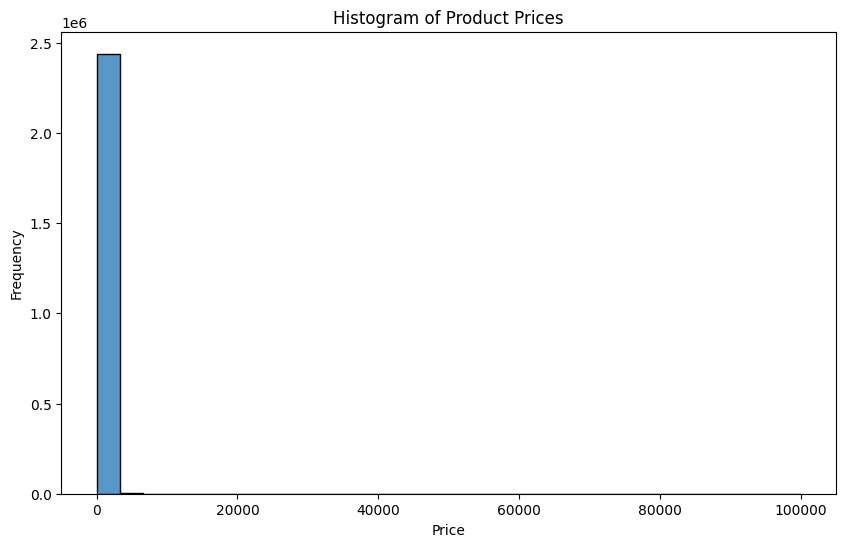

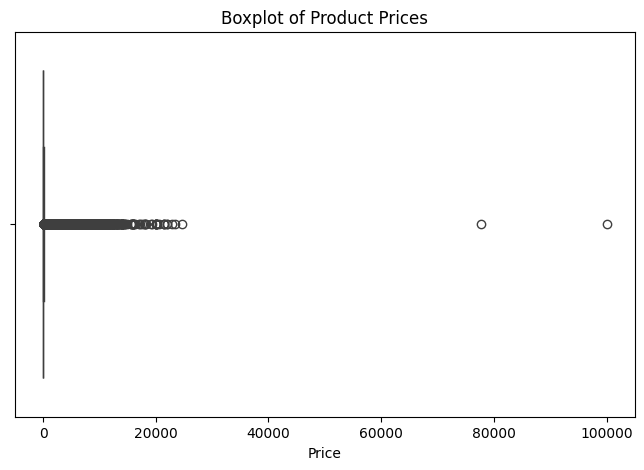

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of prices
plt.figure(figsize=(10,6))
sns.histplot(df["price"], bins=30, kde=False)
plt.title("Histogram of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Boxplot of prices
plt.figure(figsize=(8,5))
sns.boxplot(x=df["price"])
plt.title("Boxplot of Product Prices")
plt.xlabel("Price")
plt.show()


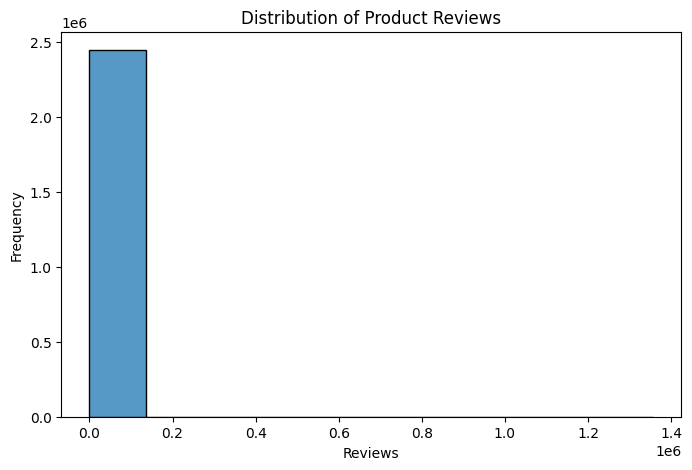

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



mean_reviews = df["reviews"].mean()
median_reviews = df["reviews"].median()
mode_reviews = df["reviews"].mode()


var_reviews = df["reviews"].var()
std_reviews = df["reviews"].std()
iqr_reviews = df["reviews"].quantile(0.75) - df["reviews"].quantile(0.25)

skew_reviews = df["reviews"].skew()
kurt_reviews = df["reviews"].kurt()


plt.figure(figsize=(8,5))
sns.histplot(df["reviews"], bins=10, kde=False)
plt.title("Distribution of Product Reviews")
plt.xlabel("Reviews")
plt.ylabel("Frequency")
plt.show()

